In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("prices.csv")
df = df[df["symbol"] == "JPM"]

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,JPM,41.790001,42.849998,41.669998,42.990002,35460500.0
2010-01-05,JPM,42.790001,43.680000,42.779999,43.840000,41208300.0
2010-01-06,JPM,43.450001,43.919998,43.310001,44.090000,27729000.0
2010-01-07,JPM,43.790001,44.790001,43.610001,45.119999,44864700.0
2010-01-08,JPM,44.369999,44.680000,44.080002,44.700001,33110100.0


In [3]:
def prepare_data(df, forecast_col, forecast_out, test_size):
    
    # Shift the column to create future labels
    label = df[forecast_col].shift(-forecast_out)
    
    # Feature matrix
    X = np.array(df[[forecast_col]])
    X = preprocessing.scale(X)
    
    # Data to be predicted in the future
    X_lately = X[-forecast_out:]
    
    # Training data
    X = X[:-forecast_out]
    
    # Drop missing labels
    label.dropna(inplace=True)
    y = np.array(label)
    
    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=test_size, random_state=0
    )
    
    return X_train, X_test, Y_train, Y_test, X_lately


In [4]:
forecast_col = "close"
forecast_out = 8   # predict 8 days ahead
test_size = 0.2


In [5]:
X_train, X_test, Y_train, Y_test, X_lately = prepare_data(
    df, forecast_col, forecast_out, test_size
)

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
score = model.score(X_test, Y_test)
forecast = model.predict(X_lately)

print("Model R² Score:", score)
print("Next 5 days predicted prices:")
print(forecast)

Model R² Score: 0.9692300335191174
Next 5 days predicted prices:
[86.93599233 87.15752822 87.29850396 87.45962427 87.54017636 86.90578403
 86.29152721 86.69431993]


In [8]:
df.columns

Index(['symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

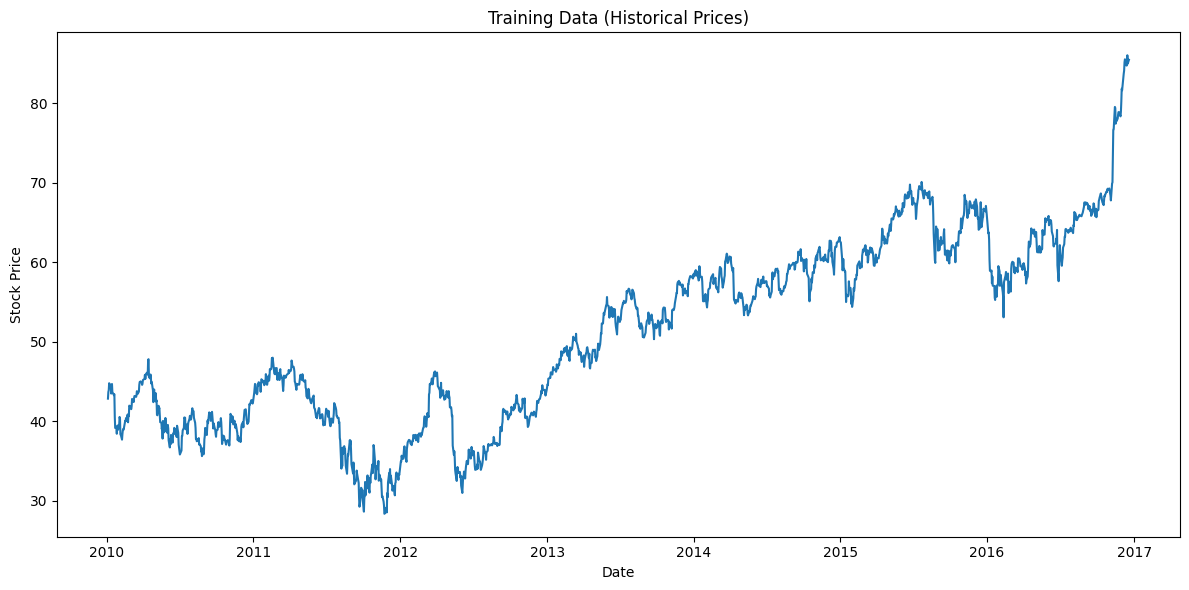

In [9]:
train_data = df[:-forecast_out]

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data["close"])
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Training Data (Historical Prices)")
plt.tight_layout()
plt.show()

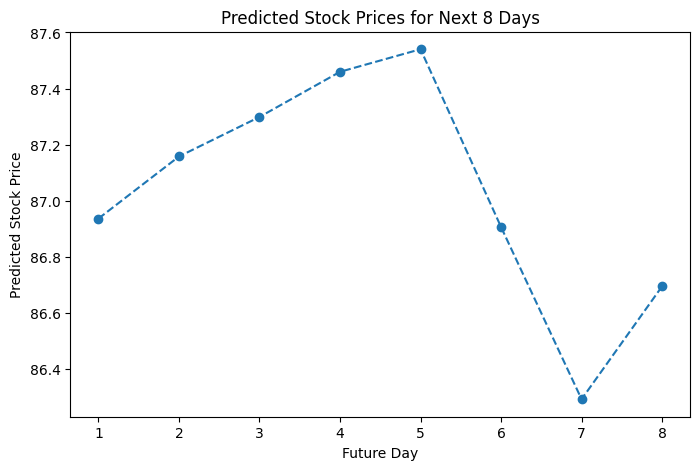

In [10]:
future_days = range(1, forecast_out + 1)

plt.figure(figsize=(8,5))
plt.plot(future_days, forecast, marker='o', linestyle='--')

plt.xlabel("Future Day")
plt.ylabel("Predicted Stock Price")
plt.title("Predicted Stock Prices for Next 8 Days")
plt.show()

In [16]:
import pickle

with open("stock_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!
